In [1]:
from pathlib import Path

import numpy as np
import torchvision as tv
import torch
from matplotlib import pyplot as plt
from py._path.svnwc import cache
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

from aegan import AEGAN

In [4]:
noise_fn = lambda x: torch.randn((x, 32), device="cpu")
aegan = AEGAN(32, noise_fn, None)
aegan.load(Path() / "small_data_results" / "checkpoints", 449)

torch.Size([1, 3, 96, 96])


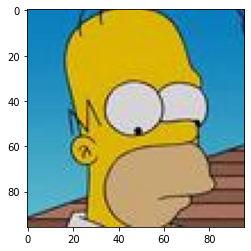

In [7]:
dataset = ImageFolder(root=str(Path() / "small_data"), transform=tv.transforms.Compose([
    tv.transforms.ToTensor(),
    tv.transforms.Normalize((0.5, 0.5, 0.5,), (0.5, 0.5, 0.5,))
]))
dataloader = DataLoader(dataset)
it = iter(dataloader)
images = [next(it)[0] for _ in range(50)]
img = images[3]
print(img.shape)
def showTensor(t, ax=None):
    t = t.numpy().squeeze().transpose((1, 2, 0))
    t = np.array((t * 0.5 + 0.5) * 255, dtype=np.uint8)
    if ax is None:
        plt.imshow(t)
    else:
        ax.imshow(t)
    # image = Image.fromarray(test_ims_show)

showTensor(img)

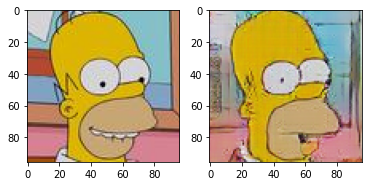

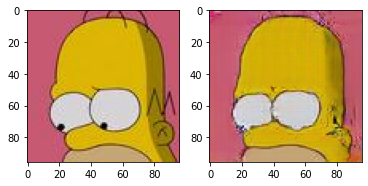

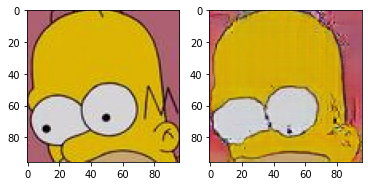

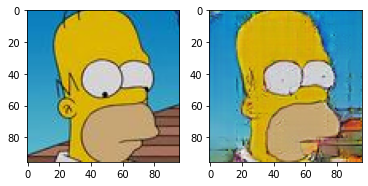

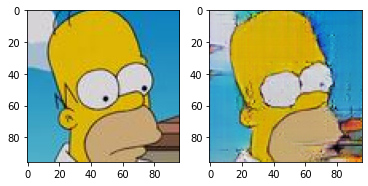

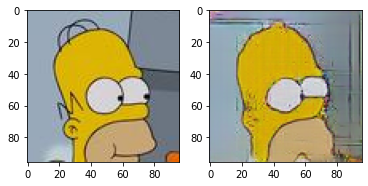

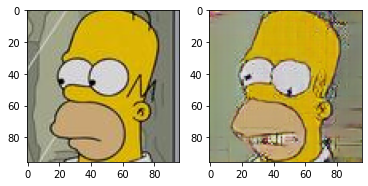

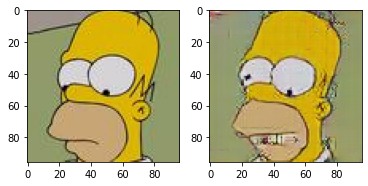

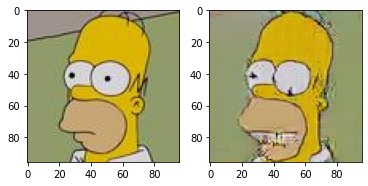

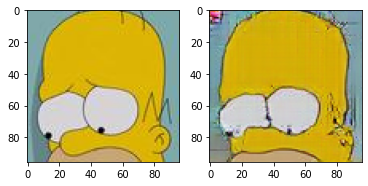

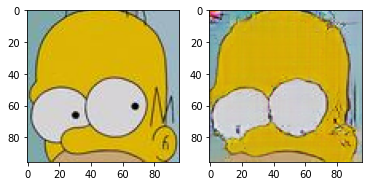

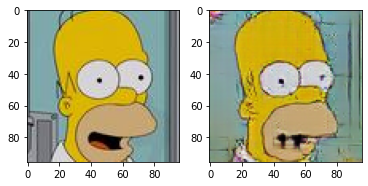

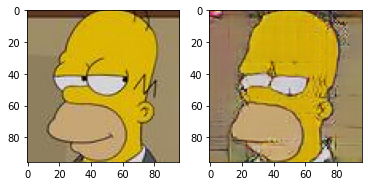

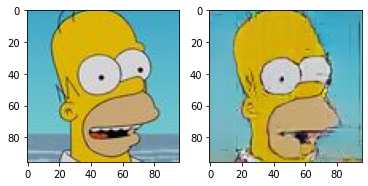

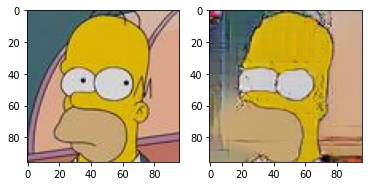

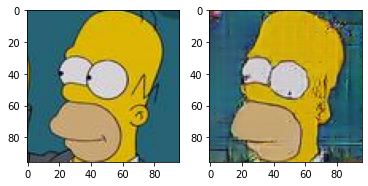

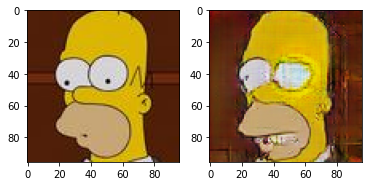

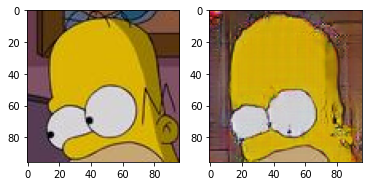

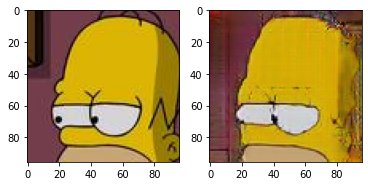

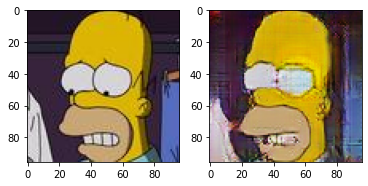

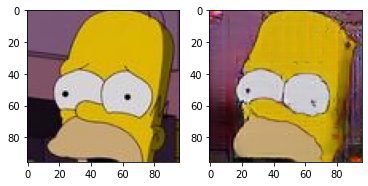

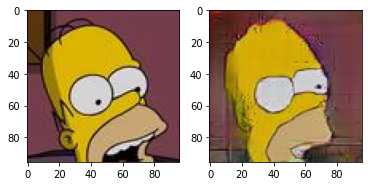

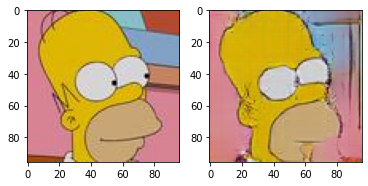

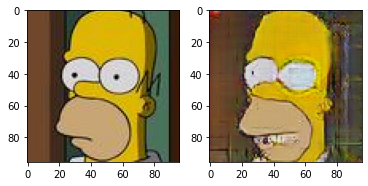

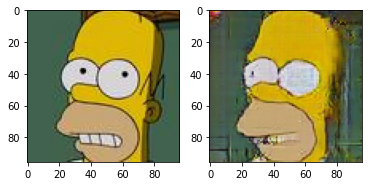

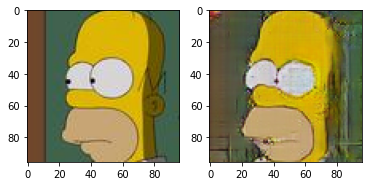

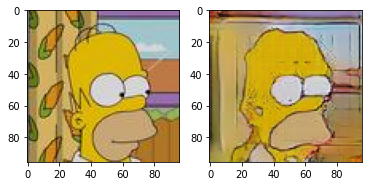

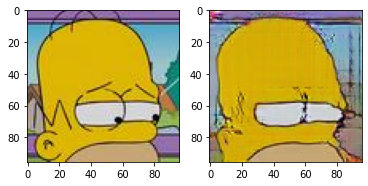

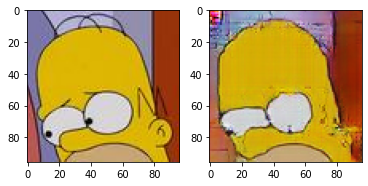

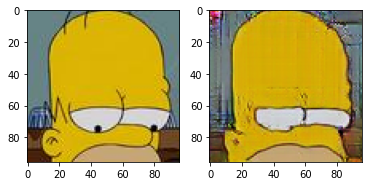

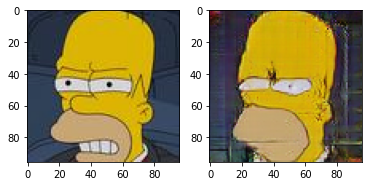

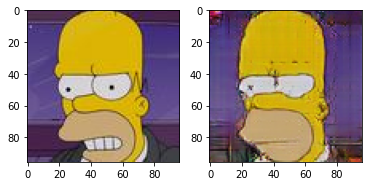

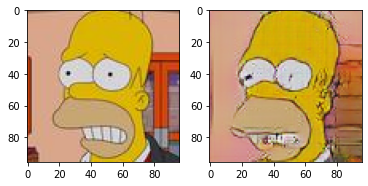

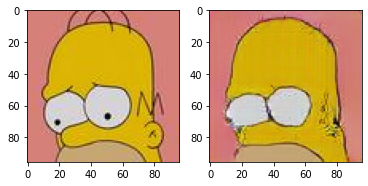

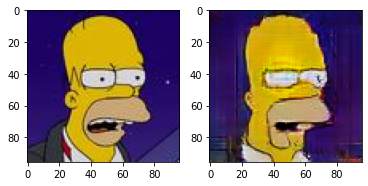

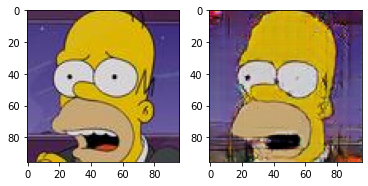

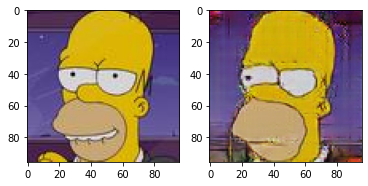

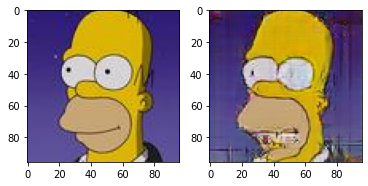

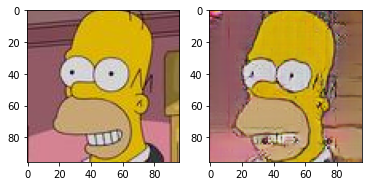

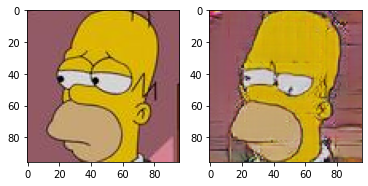

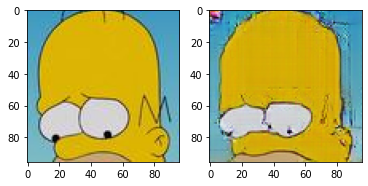

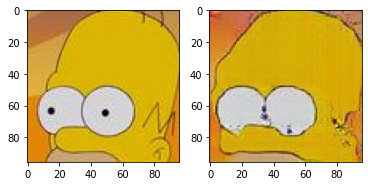

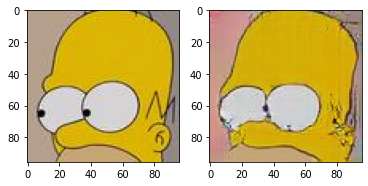

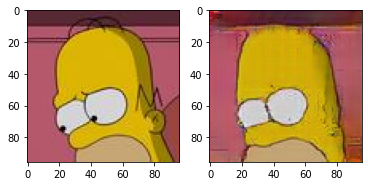

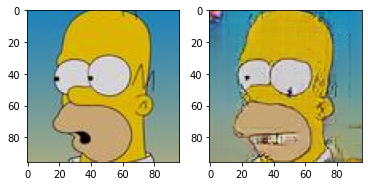

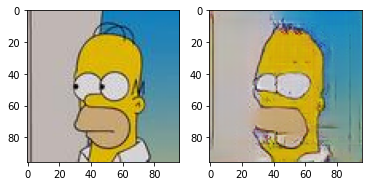

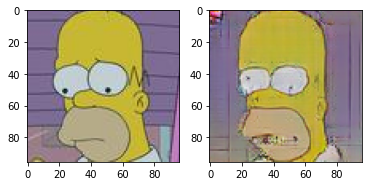

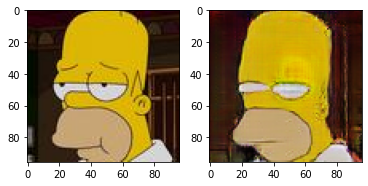

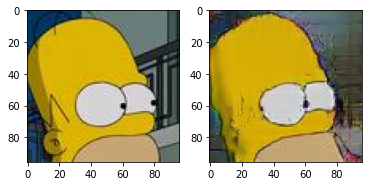

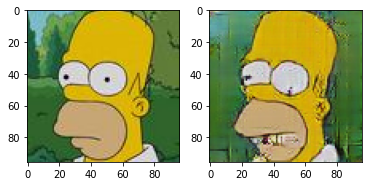

In [8]:
def showBoth(img):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    with torch.no_grad():
        aegan.encoder.eval()
        aegan.generator.eval()
        latent = aegan.encoder(img)
        restored = aegan.generator(latent)
        showTensor(img, ax1)
        showTensor(restored, ax2)
        plt.show()

for image in images:
    showBoth(image)

In [20]:
generator = MyGenerator(32)
generator.forward(latent_vector)

RuntimeError: Given transposed=1, weight of size [32, 512, 4, 4], expected input[1, 512, 4, 4] to have 32 channels, but got 512 channels instead